In [34]:
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import PIL
from PIL import Image

In [ ]:
directory = '/home/marcos/Documentos/Projetos/Keras - imagens/uvas'
data_dir = pathlib.Path(directory)

len(list(data_dir.glob('*/*.JPG')))

1600

In [5]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

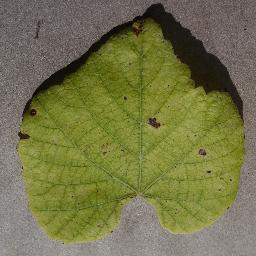

In [ ]:
leafblight = list(data_dir.glob('LeafBlight/*'))
PIL.Image.open(str(leafblight[0]))

In [17]:
for subfolder in subfolders:
    path = data_dir / subfolder
    images = list(path.glob('*.JPG'))
    print(f'Classe {subfolder}: {len(images)} imagens')

    if images:
        img = PIL.Image.open(str(images[0]))
        img_array = np.array(img)
        print(f'Dimensões da primeira imagem em {subfolder}: {img_array.shape}')

Classe BlackMeasles: 400 imagens
Dimensões da primeira imagem em BlackMeasles: (256, 256, 3)
Classe BlackRot: 400 imagens
Dimensões da primeira imagem em BlackRot: (256, 256, 3)
Classe HealthyGrapes: 400 imagens
Dimensões da primeira imagem em HealthyGrapes: (256, 256, 3)
Classe LeafBlight: 400 imagens
Dimensões da primeira imagem em LeafBlight: (256, 256, 3)


In [27]:
batch_size = 64
altura = 256
largura = 256
canais = 3

In [20]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=568,
    image_size=(altura, largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


2025-06-20 12:26:49.969176: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [21]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=568,
    image_size=(altura, largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


In [22]:
treino.class_names

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [29]:
tf.random.set_seed(424242)

modelo = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(altura, largura, canais)),
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(4, activation=tf.nn.softmax)
    ]
)

In [31]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
epocas = 10
history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10


2025-06-20 12:40:00.273662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1280]
	 [[{{node Placeholder/_4}}]]
2025-06-20 12:40:00.274504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1280]
	 [[{{node Placeholder/_4}}]]


20/20 [==============================] - ETA: 0s - loss: 60.5021 - accuracy: 0.2578

2025-06-20 12:40:17.632551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [320]
	 [[{{node Placeholder/_4}}]]
2025-06-20 12:40:17.633139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [320]
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 19s 854ms/step - loss: 60.5021 - accuracy: 0.2578 - val_loss: 13.7241 - val_accuracy: 0.4563
Epoch 2/10
20/20 [==============================] - 17s 831ms/step - loss: 7.5938 - accuracy: 0.3977 - val_loss: 4.4805 - val_accuracy: 0.4281
Epoch 3/10
20/20 [==============================] - 17s 821ms/step - loss: 2.0706 - accuracy: 0.5727 - val_loss: 1.0594 - val_accuracy: 0.6750
Epoch 4/10
20/20 [==============================] - 16s 799ms/step - loss: 1.0445 - accuracy: 0.7016 - val_loss: 1.3979 - val_accuracy: 0.6250
Epoch 5/10
20/20 [==============================] - 15s 759ms/step - loss: 1.3330 - accuracy: 0.6461 - val_loss: 1.9433 - val_accuracy: 0.6500
Epoch 6/10
20/20 [==============================] - 16s 764ms/step - loss: 0.8657 - accuracy: 0.7461 - val_loss: 0.8468 - val_accuracy: 0.7125
Epoch 7/10
20/20 [==============================] - 16s 797ms/step - loss: 0.7402 - accuracy: 0.7305 - val_loss: 0.7515 - val_accuracy: 0.7531
Epoch 8/

In [33]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 128)               25165952  
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 25,166,468
Trainable params: 25,166,468
Non-trainable params: 0
_________________________________________________________________


In [35]:
def plota_resultados(history, epocas):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    intervalo_epocas = range(epocas)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(
        intervalo_epocas,
        acc,
        'r',
        label='Acurácia do treino'
    )

    plt.plot(
        intervalo_epocas,
        val_acc,
        'b',
        label='Acurácia de validação'
    )

    plt.subplot(1, 2, 2)

    plt.plot(
        intervalo_epocas, 
        loss,
        'r',
        label='Perda do treino'
    )

    plt.plot(
        intervalo_epocas, 
        val_loss,
        'b',
        label='Perda da validação'
    )

    plt.legend(loc='upper right')
    plt.show()

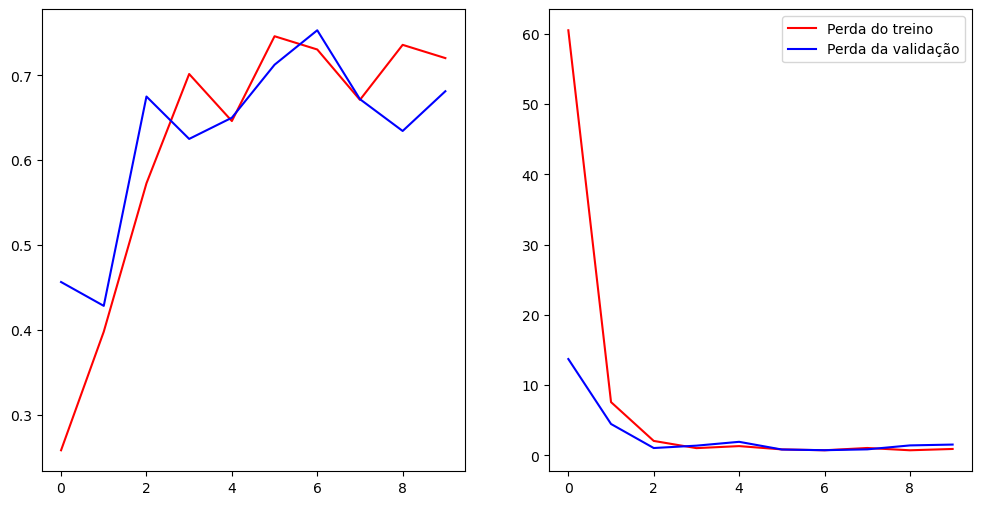

In [36]:
plota_resultados(history, epocas)